# Airline Satisfaction - Univariate & Bivariate Analysis

## PROBLEM STATEMENT
Predicting customer satisfaction based on their holistic experience while traveling by air.

## PROJECT OUTCOME
For this project, we intend to explore survey results provided by passengers (anonymized), and understand what causes them to be satisfied or dissatisfied. Ultimately, we hope our findings enable us to make recommendations on how to address the factors that cause dissatisfaction.

## BUSINESS IMPACT
Airline businesses around the world are decimated by Covid-19 as most international air travel has been grounded. In fact, some airlines such as Thai Airways have already filed for bankruptcy. Nonetheless, once the storm is over, demand for air travel is expected to surge as people rush back for overseas holidays. What can airlines prepare to give themselves a competitive edge when the crowd finally arrives? Customer satisfaction is always top of mind for airlines. Unhappy or disengaged customers naturally mean fewer passengers and less revenue. It’s important that customers have an excellent experience every time they travel. On-time flights, good in-flight entertainment, more (and better) snacks, and more legroom might be the obvious contributors to a good experience and more loyalty. While we might hear about those aspects the most, the customer experience is not about just the flight itself. It’s everything from purchasing the ticket on the company’s website or mobile app to checking bags in at the airport or via a mobile app to waiting in the terminal. This mindset has been, and continues to be, adapted to the post-security, onboard, and post-flight experience. So how can we determine which of these factors contribute to the satisfaction of the customer? To answer this, we intend on building a classification problem to predict the customer satisfactio

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.api import OLS
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Dataset

In [41]:
df=pd.read_csv('train.csv')

In [42]:
data=df

In [43]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.shape

(103904, 25)

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
df.dropna(inplace=True)
df.shape

(103594, 25)

### Univariate analysis of Categorical Columns

In [10]:
cat=df.select_dtypes(include=np.object).columns
cat

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

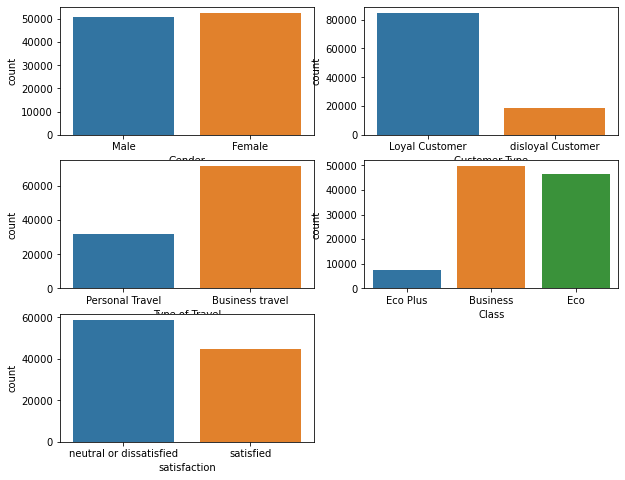

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
sns.countplot(df[cat[0]])
plt.subplot(3,2,2)
sns.countplot(df[cat[1]])
plt.subplot(3,2,3)
sns.countplot(df[cat[2]])
plt.subplot(3,2,4)
sns.countplot(df[cat[3]])
plt.subplot(3,2,5)
sns.countplot(df[cat[4]])

### Univariate Analysis of Ratings

In [12]:
ratings=['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

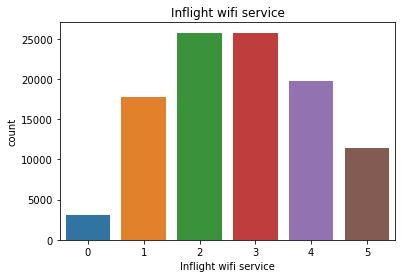

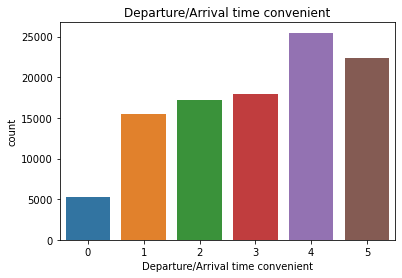

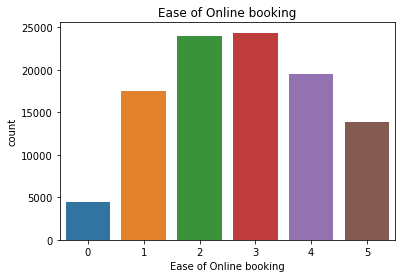

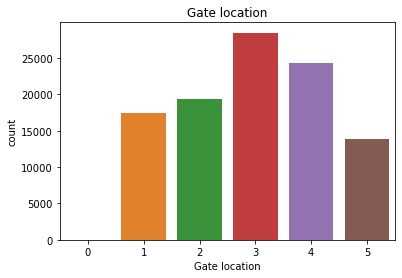

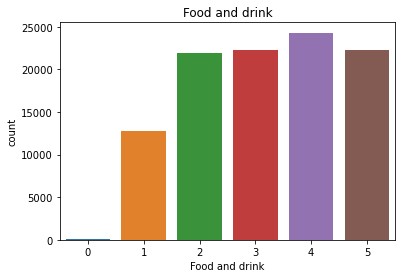

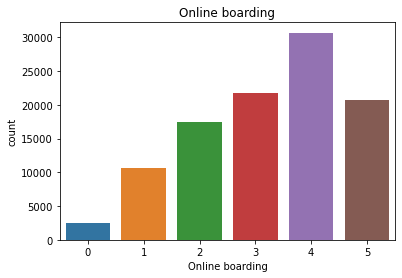

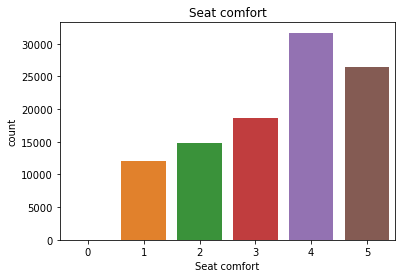

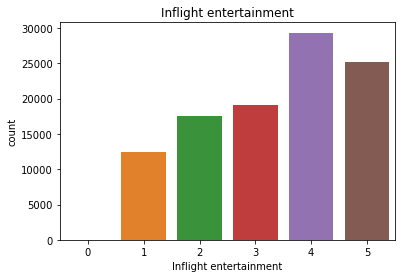

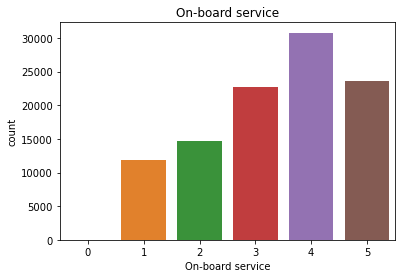

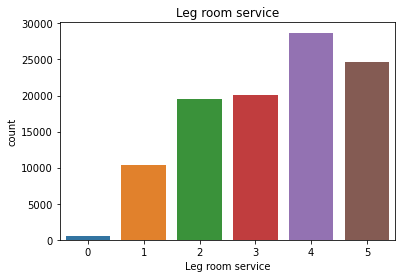

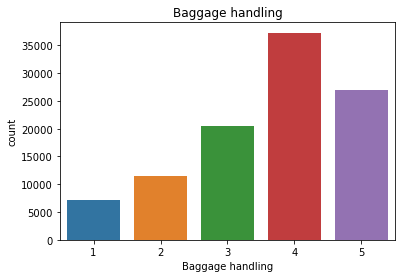

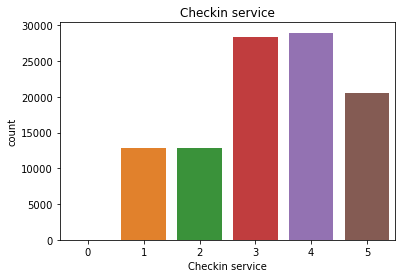

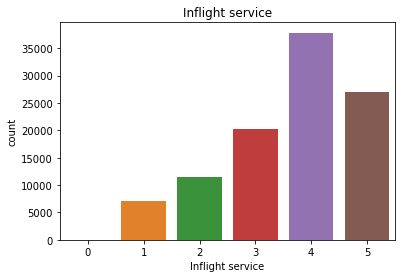

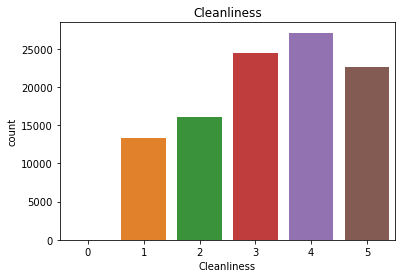

In [13]:
for i in ratings:
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Improvement Needed
* **Arrival/Deperture Time:** Generally Satisfactory with scope for improvement
* **Online Booking:** Improvement Needed
* **Gate Location:** Generally Satisfactory with scope for improvement
* **Food And Drink:** Generally Satisfactory with scope for improvement
* **Online Boarding:** Generally Satisfactory
* **Seat Comfort:** Generally Satisfactory 
* **Inflight Entertainment:** Generally satisfactory with scope for improvement
* **On-Board Service:** Generally satisfactory with scope for improvement
* **Leg room Service:** Generally satisfactory with scope for improvement
* **Baggage Handling:** Generally Satisfactory, significant 1 ratings
* **Checkin Service:** Generally satisfactory
* **Inflight Service:** Generally satisfactory
* **Cleanliness:** Generally satisfactory with scope for improvement

## Categoriacal Features

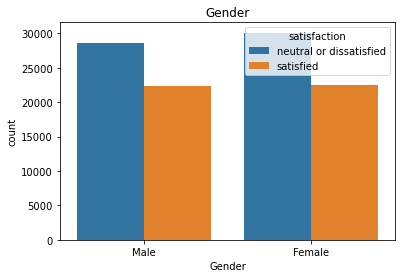

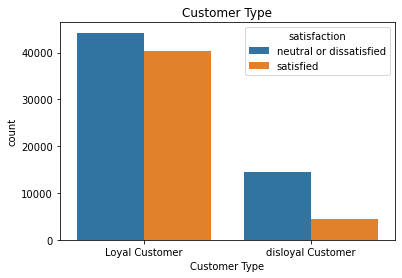

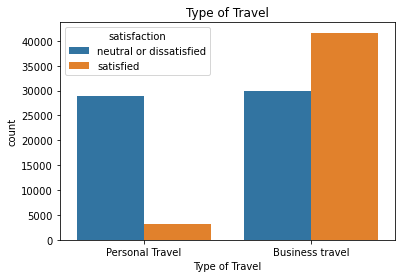

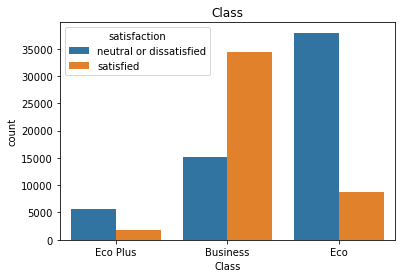

In [14]:
cat=['Gender', 'Customer Type', 'Type of Travel', 'Class']
for i in cat:
    sns.countplot(df[i],hue=df.satisfaction)
    plt.title(i)
    plt.show()

### Inference from Categorical Features

* **Gender:** No significant difference in satisfactionbased on gender
* **Customer Type:** Dissatisfaction is significantly high among disloyal customers. But even in loyal customers, there are more unsatisfied customers as compared to satisfied ones, although the numbers are close.
* **Type of Travel:** Personal travellers show very high rate of dissatisfaction, while most bussiness travellers are satisfied.
* **Class:** Economy class and Economy Plus class passengers show high rate of dissatisfaction

### Bivariate Analysis of Ratings

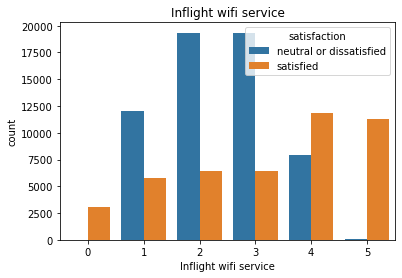

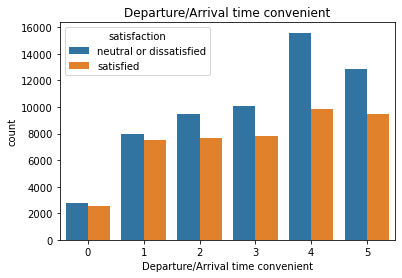

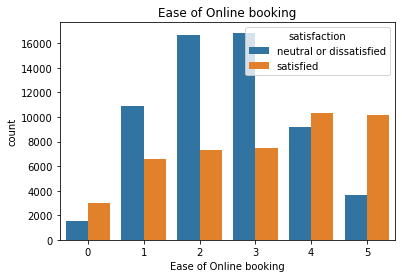

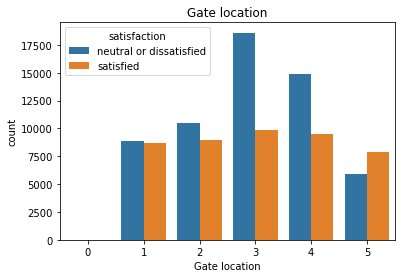

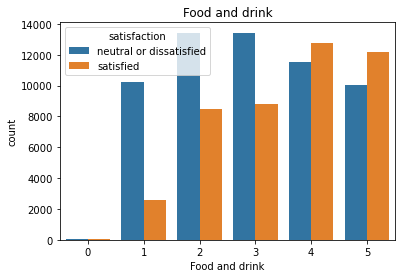

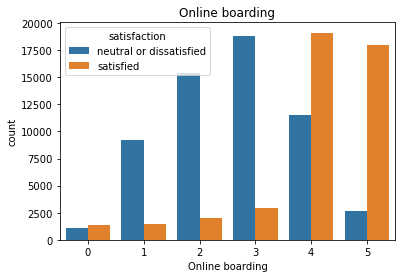

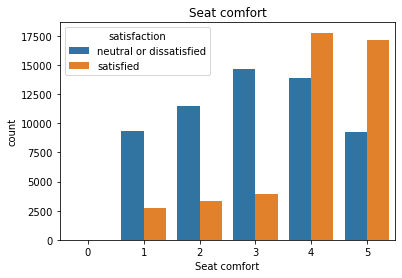

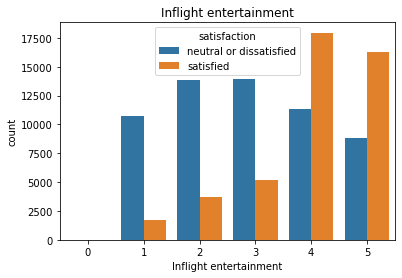

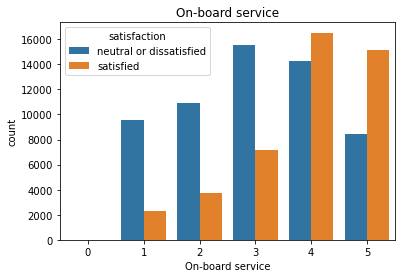

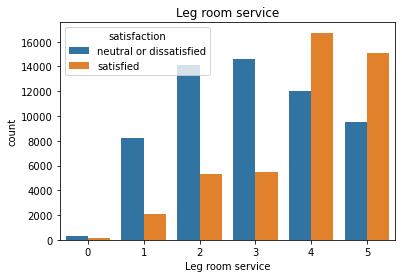

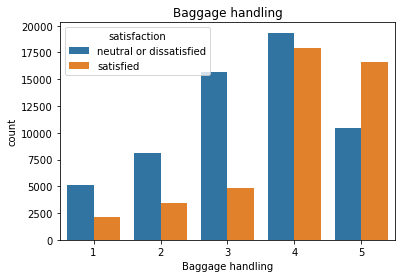

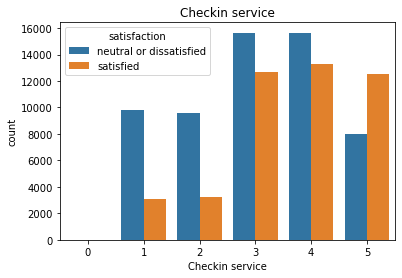

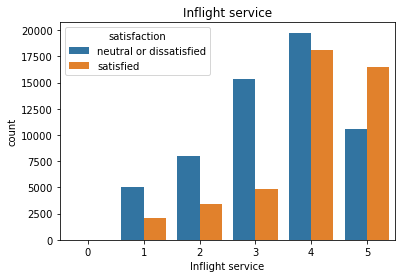

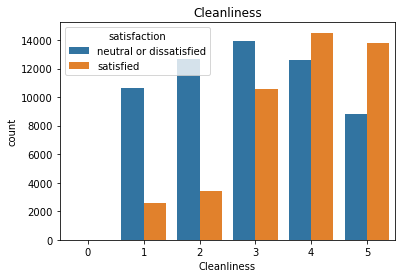

In [15]:
for i in ratings:
    sns.countplot(df[i],hue=df.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Cause of Dissatisfaction
* **Arrival/Deperture Time:** Satisfactory for all
* **Online Booking:** Cause of Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Some Dissatisfaction
* **Online Boarding:** Cause of Dissatisfaction
* **Seat Comfort:** Some Dissatisfaction
* **Inflight Entertainment:** Some Dissatisfaction
* **On-Board Service:** Some Dissatisfaction
* **Leg room Service:** Significant Dissatisfaction
* **Baggage Handling:** Generally Satisfactory
* **Checkin:** Some Dissatisfaction
* **Inflight Service:** Satisfactory for all
* **Cleanliness:** Significant Dissatisfaction

##### Causes of Dissatisfaction
* The Main Causes of dissatisfaction are: **In-Flight Wifi, Online Booking and Online boarding**
* Less But Observable Dissatisfaction is cauesd by **Leg-Room Services and Cleanliness**
* Some Dissatisfaction is also caused by Gate Location, Food and Drinks, Seat Comfort, Inflight Entertainment, On Board Services and Checkin Services

* Online Boarding Shows generally satisfactory ratings, but is one of the main cauese of dissatisfaction among the dissatisfied customers

##### Satisfactory Areas
* **Arrival/ Departure Time, Baggage Handling, in-Flight Services** show satisfactory ratings

### Class-Wise Analysis

Since we saw significant difference in satisfaction among different passenres classes, we divide the data class wise and analise the main causes of dissatisfaction

#### Economy Class Passengers

In [16]:
eco=df[df['Class']=='Eco']
eco.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied
10,10,34991,Female,disloyal Customer,24,Business travel,Eco,1182,4,5,...,2,3,3,5,3,5,2,0,0.0,neutral or dissatisfied
12,12,98628,Male,Loyal Customer,53,Business travel,Eco,834,1,4,...,1,1,1,3,4,4,1,28,8.0,neutral or dissatisfied


In [17]:
eco.shape

(46593, 25)

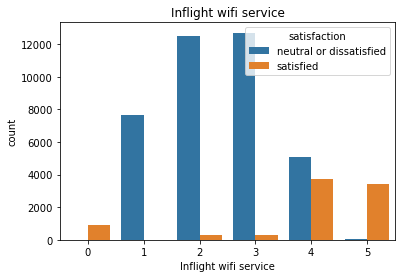

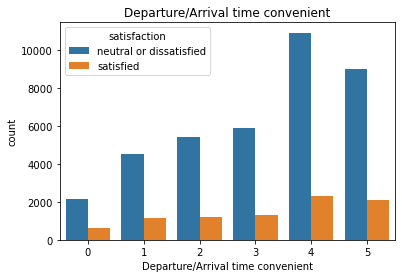

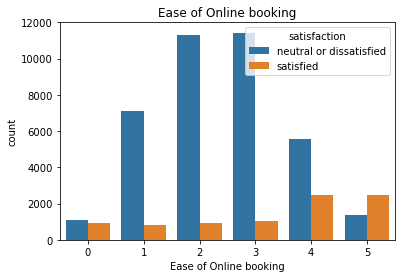

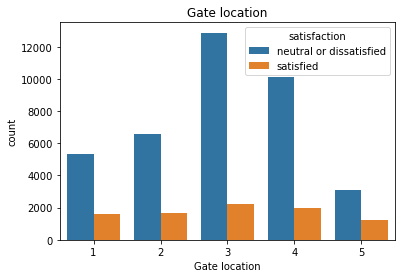

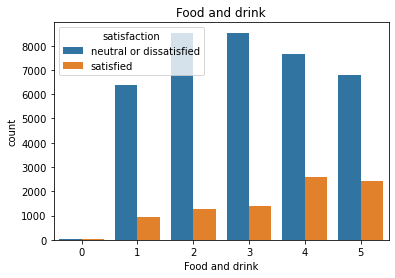

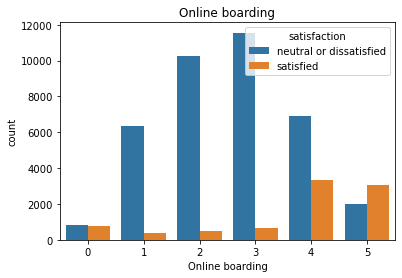

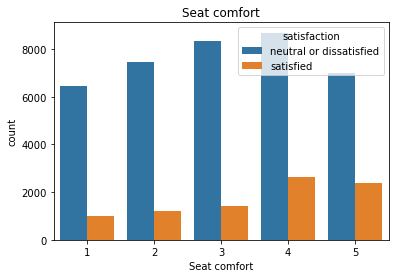

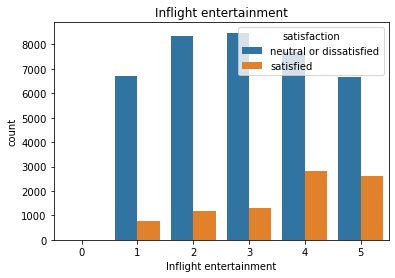

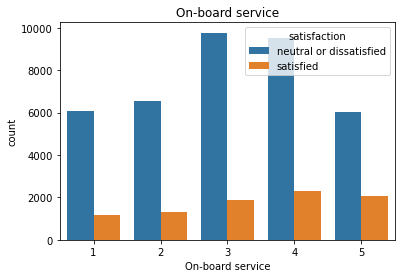

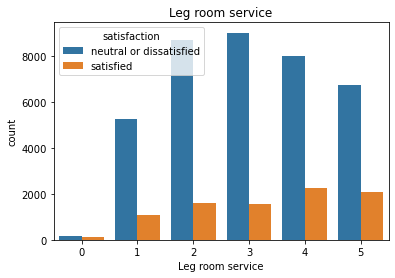

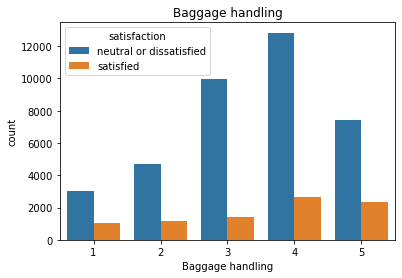

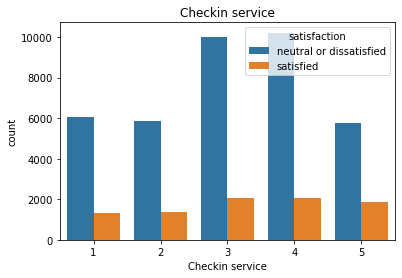

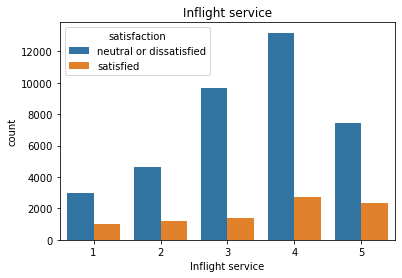

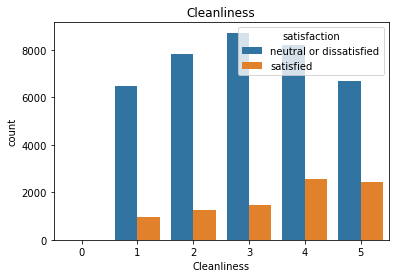

In [18]:
for i in ratings:
    sns.countplot(eco[i],hue=eco.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Cause of Dissatisfaction
* **Arrival/Deperture Time:** Satisfactory
* **Online Booking:** Cause of Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Significant Dissatisfaction
* **Online Boarding:** Cause of Dissatisfaction
* **Seat Comfort:** Significant Dissatisfaction
* **Inflight Entertainment:** Significant Dissatisfaction
* **On-Board Service:** Some Dissatisfaction
* **Leg room Service:** Some Dissatisfaction
* **Baggage Handling:** Satisfactory
* **Checkin:** Some Dissatisfaction
* **Inflight Service:** Satisfactory
* **Cleanliness:** Some Dissatisfaction

##### Causes of Dissatisfaction
* The Main Causes of dissatisfaction are: **In-Flight Wifi, Online Booking and Online boarding**
* Less But Observable Dissatisfaction is cauesd by **Food and Drinks, Seat Comfort and Inflight Entertainment**
* Some Dissatisfaction is also caused by Gate Location, On Board Services, Leg-Room Services, Checkin Services and Cleanliness

##### Satisfactory Areas
* **Arrival/ Departure Time, Baggage Handling, in-Flight Services** show satisfactory ratings

#### Economy Plus Passengers

In [20]:
ecop=df[df['Class']=='Eco Plus']
ecop.shape

(7468, 25)

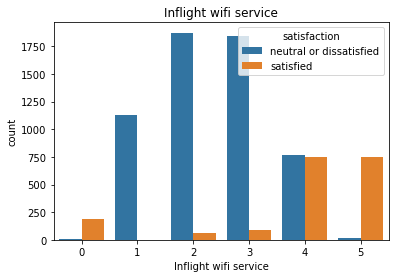

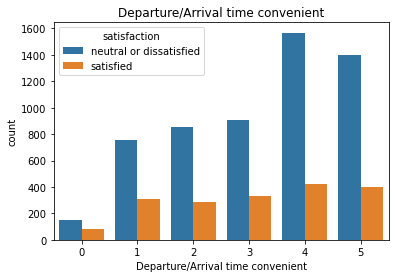

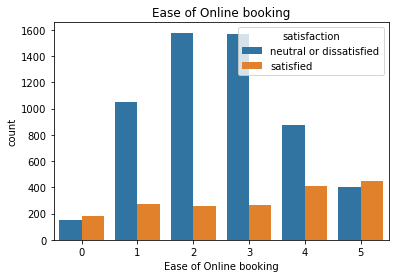

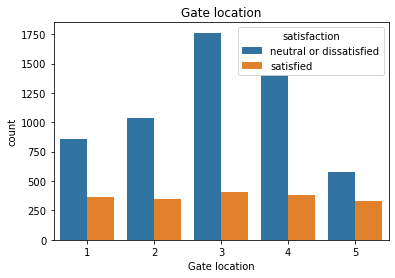

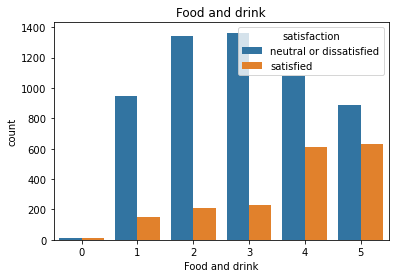

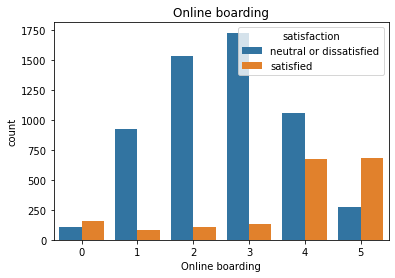

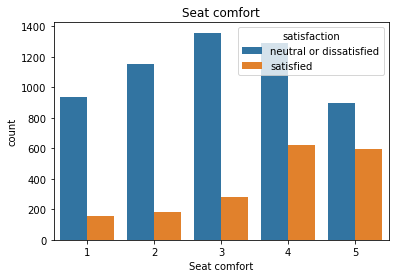

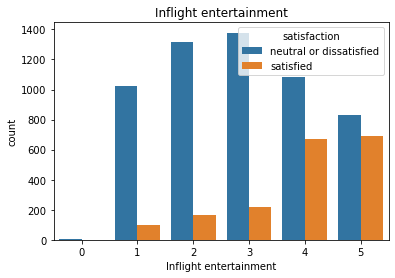

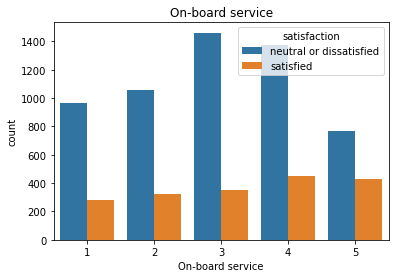

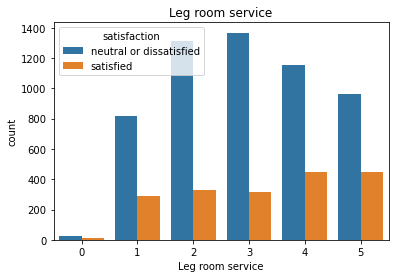

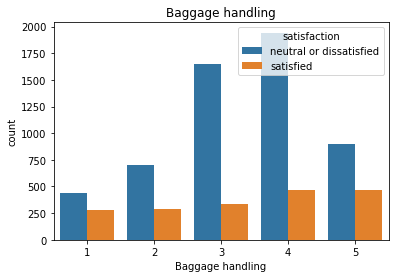

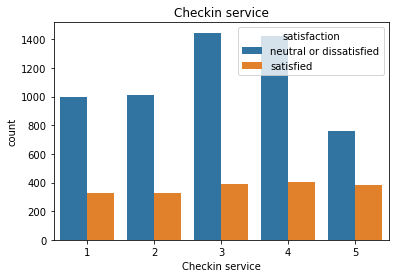

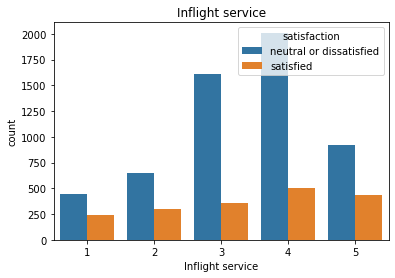

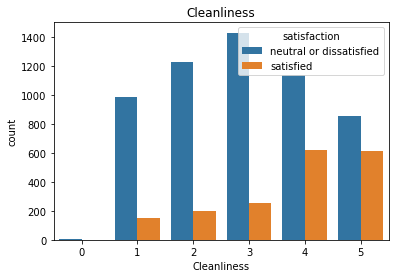

In [21]:
for i in ratings:
    sns.countplot(ecop[i],hue=ecop.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Cause of Dissatisfaction
* **Arrival/Deperture Time:** Satisfactory
* **Online Booking:** Cause of Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Significant Dissatisfaction
* **Online Boarding:** Cause of Dissatisfaction
* **Seat Comfort:** Significant Dissatisfaction
* **Inflight Entertainment:** Significant Dissatisfaction
* **On-Board Service:** Some Dissatisfaction
* **Leg room Service:** Some Dissatisfaction
* **Baggage Handling:** Satisfactory
* **Checkin:** Some Dissatisfaction
* **Inflight Service:** Satisfactory
* **Cleanliness:** Significant Dissatisfaction

##### Causes of Dissatisfaction
* The Main Causes of dissatisfaction are: **In-Flight Wifi, Online Booking and Online boarding**
* Less But Observable Dissatisfaction is cauesd by **Food and Drinks, Seat Comfort, Inflight Entertainment and Cleanliness**
* Some Dissatisfaction is also caused by Gate Location, On Board Services, Leg-Room Services and Checkin Services

#### Business Class Passengers

In [27]:
busi=df[df['Class']=='Business']
busi.shape

(49533, 25)

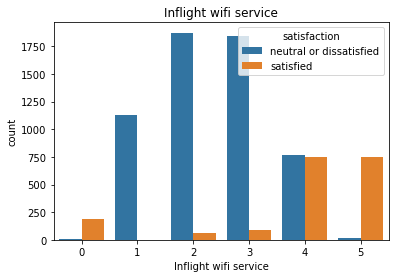

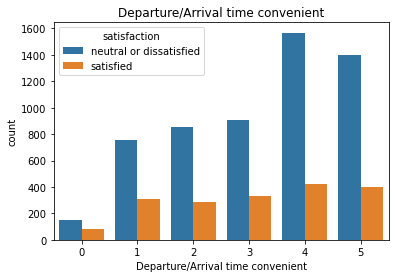

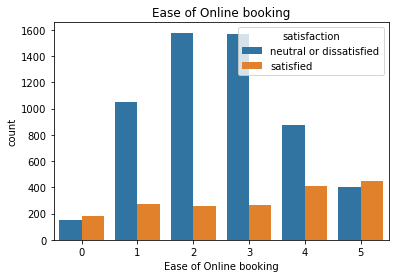

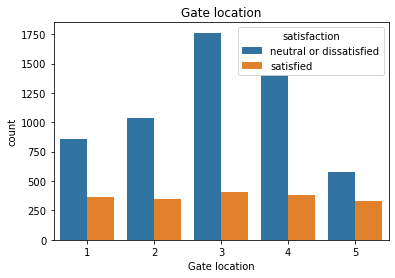

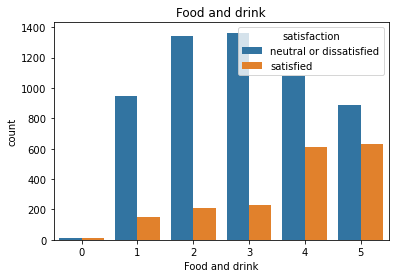

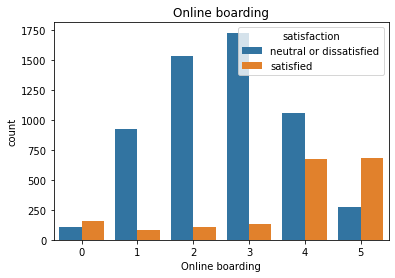

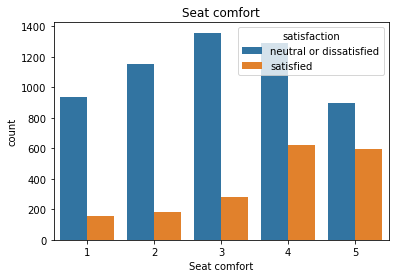

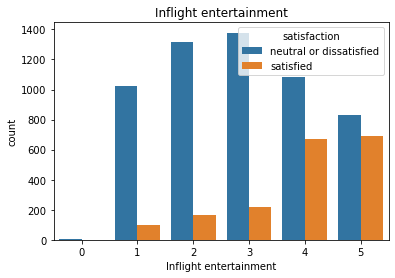

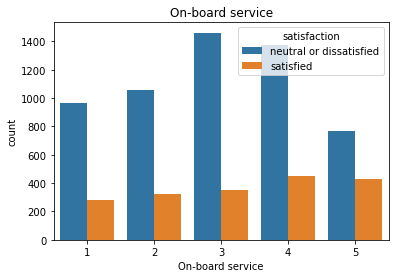

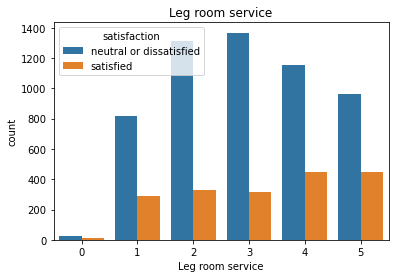

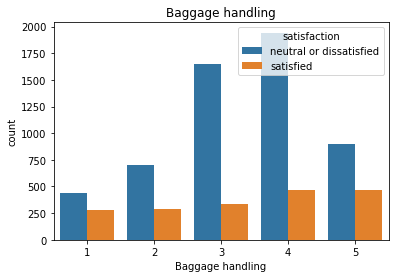

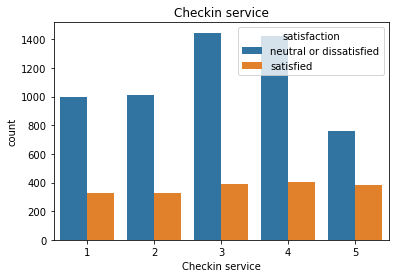

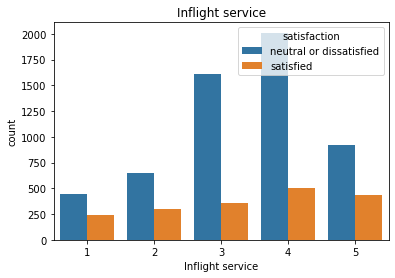

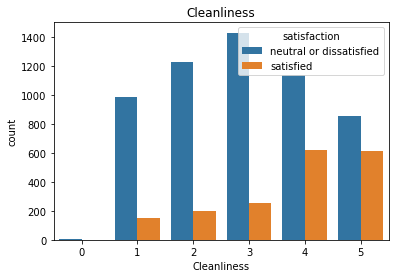

In [28]:
for i in ratings:
    sns.countplot(ecop[i],hue=ecop.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Cause of Dissatisfaction
* **Arrival/Deperture Time:** Satisfactory
* **Online Booking:** Cause of Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Significant Dissatisfaction
* **Online Boarding:** Cause of Dissatisfaction
* **Seat Comfort:** Significant Dissatisfaction
* **Inflight Entertainment:** Significant Dissatisfaction
* **On-Board Service:** Significant Dissatisfaction
* **Leg room Service:** Some Dissatisfaction
* **Baggage Handling:** Satisfactory
* **Checkin:** Significant Dissatisfaction
* **Inflight Service:** Satisfactory
* **Cleanliness:** Significant Dissatisfaction

##### Causes of Dissatisfaction
* The Main Causes of dissatisfaction are: **In-Flight Wifi, Online Booking and Online boarding**
* Less But Observable Dissatisfaction is cauesd by **Food and Drinks, Seat Comfort, Inflight Entertainment, On Board Services, Checkin Services and Cleanliness**
* Some Dissatisfaction is also caused by Gate Location and Leg-Room Services

### Factors Affecting Dissatisfaction (Class-wise)

In [65]:
busiclass=['Wifi, Online Booking, Online boarding',
           'Food, Seat, Entertainment, OnBoard Services, Checkin, Cleanliness',
           'Gate Location, Leg-Room Services']
ecopclass=['Wifi, Online Booking, Online boarding',
           'Food, Seat, Entertainment, Cleanliness',
           'Gate Location, OnBoard Services, Leg-Room Services, Checkin']
ecoclass=['Wifi, Online Booking, Online boarding',
          'Food, Seat, Entertainment',
          'Gate Location, OnBoard Services, Leg-Room Services, Checkin, Cleanliness']
          
columns=['Main Cause of Dissatisfaction','Significant Dissatisfaction','Some Dissatisfaction']


x=pd.DataFrame({'Business Class':busiclass,'Economy Plus':ecopclass,'Economy Class':ecoclass},
              index=['Main Cause of Dissatisfaction','Significant Dissatisfaction','Some Dissatisfaction']
).T

x

,Main Cause of Dissatisfaction,Significant Dissatisfaction,Some Dissatisfaction
Business Class,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment, OnBoard Services, C...","Gate Location, Leg-Room Services"
Economy Plus,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment, Cleanliness","Gate Location, OnBoard Services, Leg-Room Serv..."
Economy Class,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment","Gate Location, OnBoard Services, Leg-Room Serv..."


### Travel Type wise Analysis

Since there was a serious difference in satisfaction based on Travel Type, we further analyse the reasons for the same

#### Personal Travellers

In [35]:
personal=df[df['Type of Travel']=='Personal Travel']
personal.shape

(32129, 25)

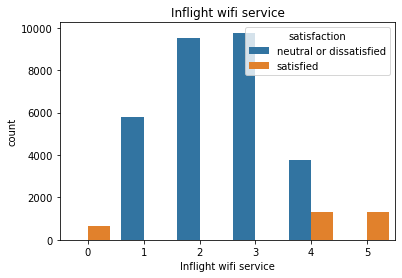

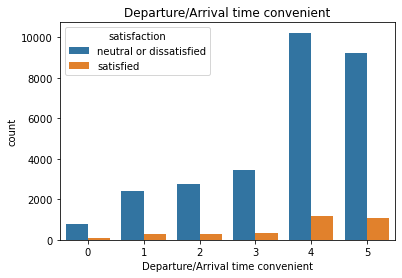

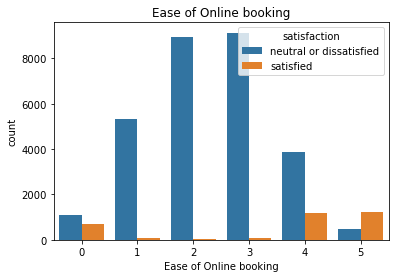

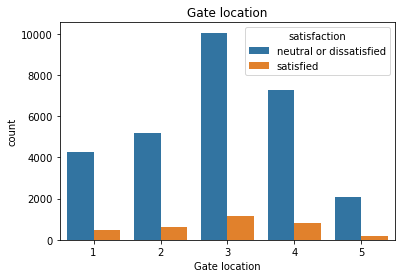

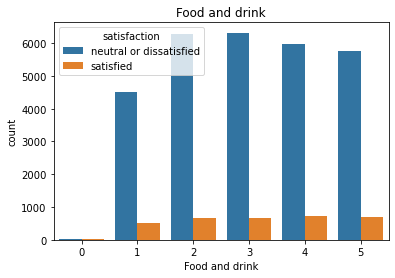

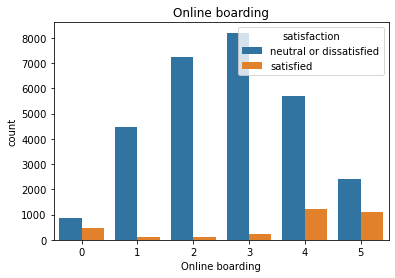

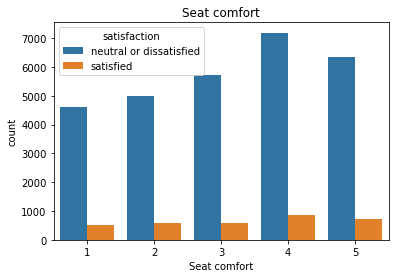

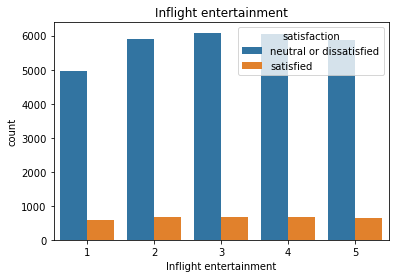

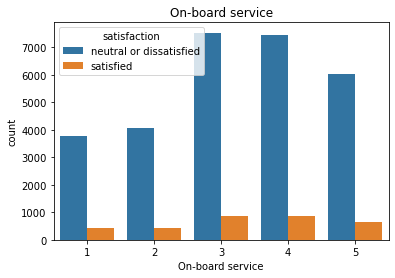

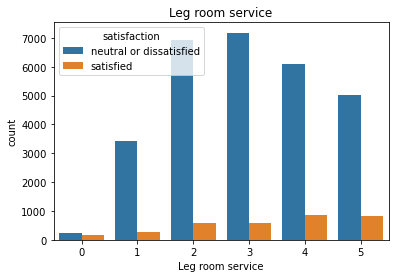

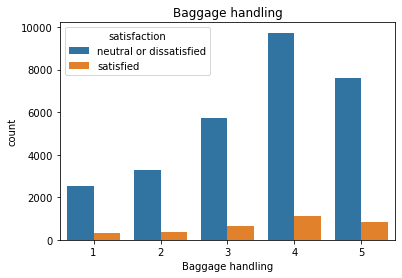

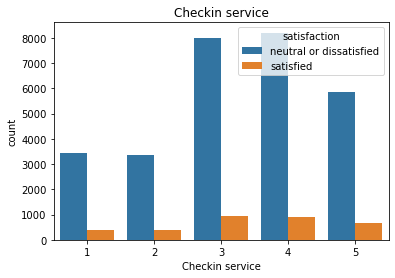

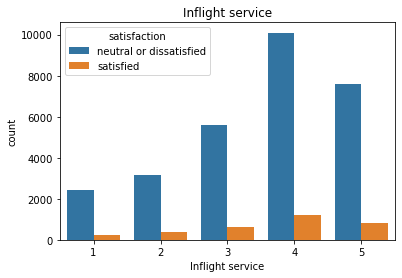

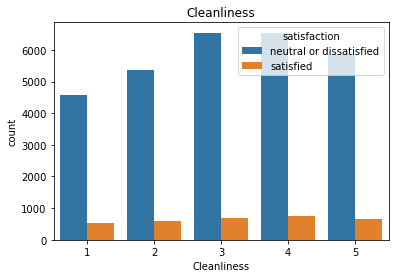

In [32]:
for i in ratings:
    sns.countplot(personal[i],hue=personal.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Cause of Dissatisfaction
* **Arrival/Deperture Time:** Satisfactory
* **Online Booking:** Cause of Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Some Dissatisfaction
* **Online Boarding:** Significant Dissatisfaction
* **Seat Comfort:** Some Dissatisfaction
* **Inflight Entertainment:** Significant Dissatisfaction
* **On-Board Service:** Some Dissatisfaction
* **Leg room Service:** Some Dissatisfaction
* **Baggage Handling:** Satisfactory
* **Checkin:** Some Dissatisfaction
* **Inflight Service:** Satisfactory
* **Cleanliness:** Significant Dissatisfaction

##### Causes of Dissatisfaction
* The Main Causes of dissatisfaction are: **In-Flight Wifi and Online Booking**
* Less But Observable Dissatisfaction is cauesd by **Online boarding, Inflight Entertainment and Cleanliness**
* Some Dissatisfaction is also caused by Gate Location, Food and Drinks, Seat Comfort,  On Board Services, Leg-Room Services and Checkin Services

#### Business Travellers

In [36]:
business=df[df['Type of Travel']=='Business travel']
business.shape

(71465, 25)

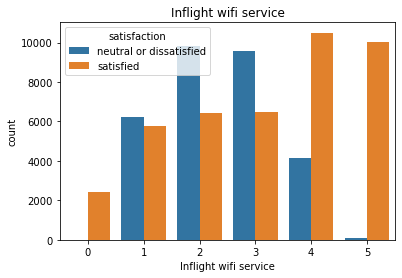

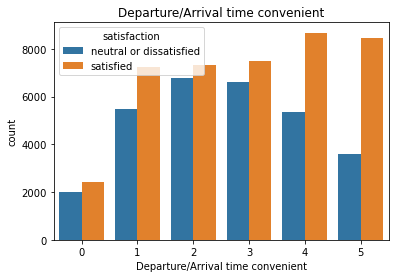

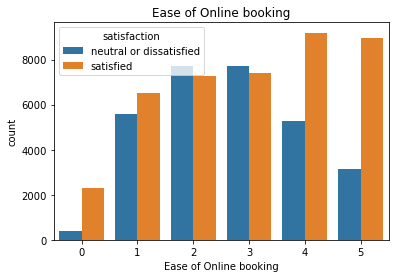

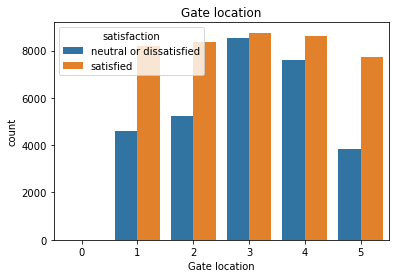

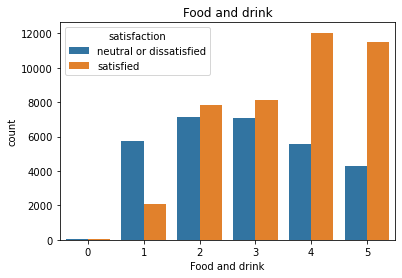

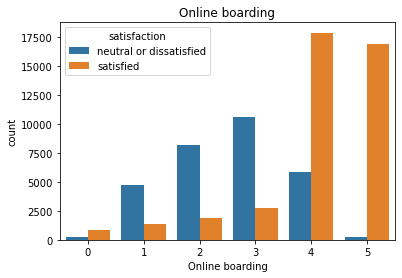

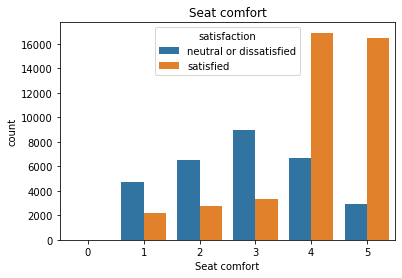

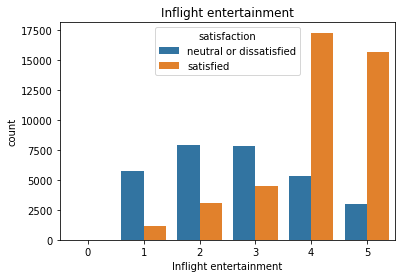

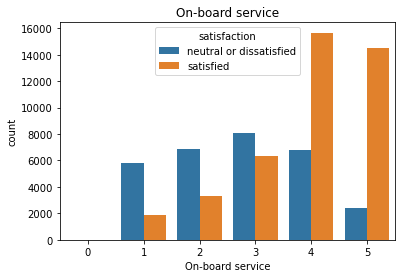

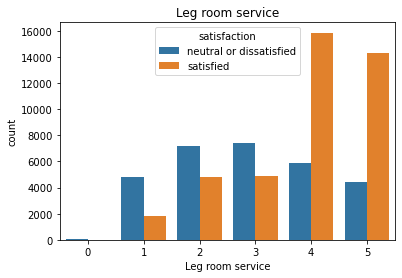

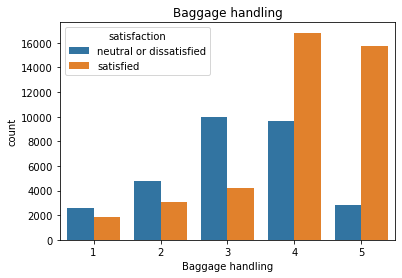

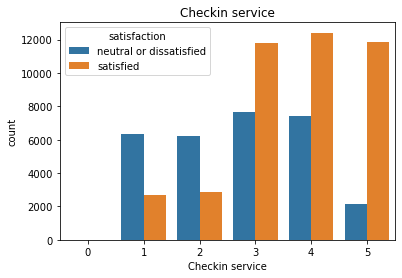

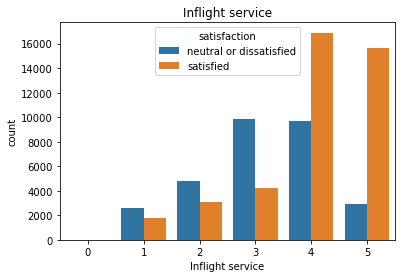

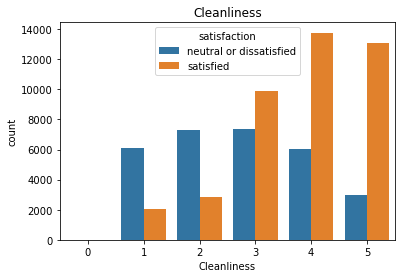

In [37]:
for i in ratings:
    sns.countplot(business[i],hue=business.satisfaction)
    plt.title(i)
    plt.show()

#### Inference from Ratings
* **Wifi:** Significant Dissatisfaction
* **Arrival/Deperture Time:** Significant Dissatisfaction
* **Online Booking:** Significant Dissatisfaction
* **Gate Location:** Some Dissatisfaction
* **Food And Drink:** Significant Dissatisfaction
* **Online Boarding:** Cause of Dissatisfaction
* **Seat Comfort:** Some Dissatisfaction
* **Inflight Entertainment:** Significant Dissatisfaction
* **On-Board Service:** Significant Dissatisfaction
* **Leg room Service:** Some Dissatisfaction
* **Baggage Handling:** Some Dissatisfaction
* **Checkin:** Significant Dissatisfaction
* **Inflight Service:** Some Dissatisfaction
* **Cleanliness:** Significant Dissatisfaction

### Analysis of Business Travellers

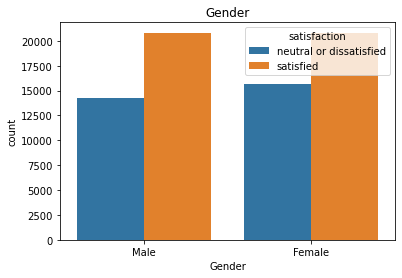

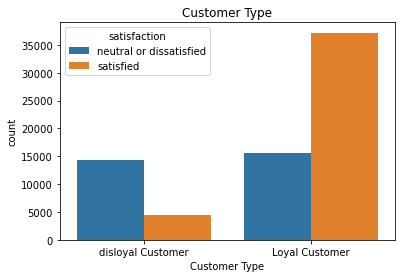

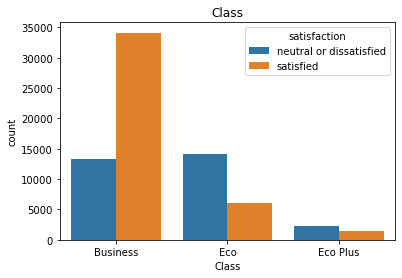

In [38]:
cat=['Gender', 'Customer Type', 'Class']
for i in cat:
    sns.countplot(business[i],hue=business.satisfaction)
    plt.title(i)
    plt.show()

#### Inferences from Business travellers
* Business travellers in Economy class show significant dissatisfaction
* There is a significant difference in the causes for dissatisfaction among the Business travellers, the reason might be that this group of business travellers are a mixxed group travelling in all the three classes as above and causes for dissatisfaction might be different in different classes. Hence the rating pattern in this group is significantly different from other groups.

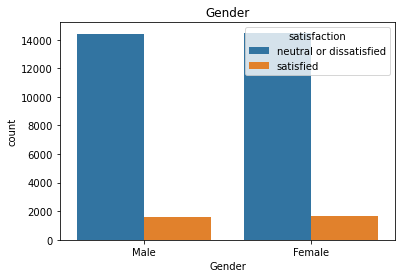

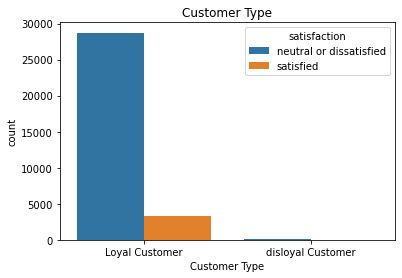

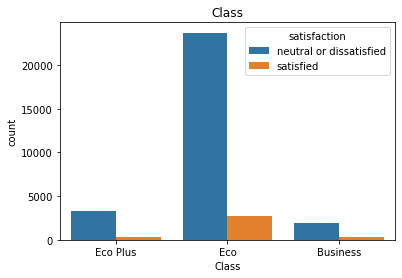

In [39]:
cat=['Gender', 'Customer Type', 'Class']
for i in cat:
    sns.countplot(personal[i],hue=personal.satisfaction)
    plt.title(i)
    plt.show()

Loyal Customers travelling in Economy class for Personal Reasons represent the largest bracket of unsatisfied customers

## Checking Stats for only the unsatisfied Customers

In [45]:
unsatisfied = df[df['satisfaction']=='neutral or dissatisfied']
unsatisfied.shape

(58879, 25)

In [47]:
cat=unsatisfied.select_dtypes(include=np.object).columns
cat

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

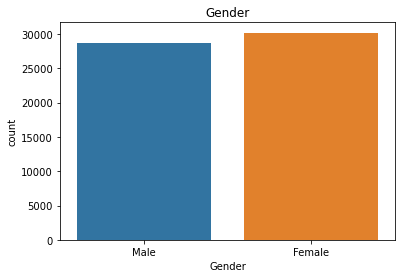

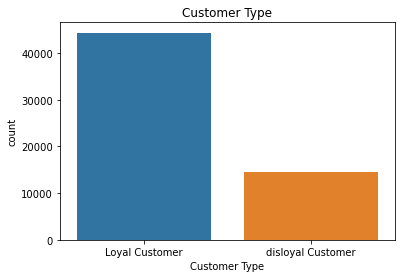

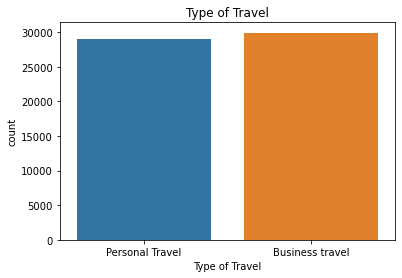

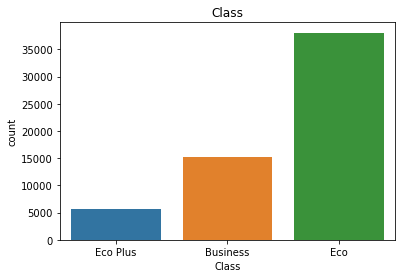

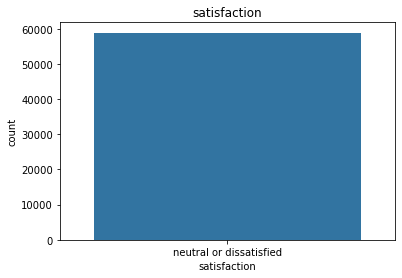

In [49]:
for i in cat:
    sns.countplot(unsatisfied[i])
    plt.title(i)
    plt.show()

### Inferences

* Although in absolute term there are much more loyal customers who are dissatisfied as compared to disloyal ones, but this cannot be used to conclude that more loyal customers are dissatisfied because the dataset is hihgly skewed in term of loyal and disloyal customers
* Number of dissatisfied customers is equally among business and personal travellers
* Even though there are more number of business class travellers, this shows that there is significant level of dissatisfaction among economy class customers

# Final Infererences

* Gender doesnot affect customer satisfaction
* Disloyal Customers tend to be more unsatisfied as compared to loyal customers.
* There is a significant difference in customer satisfaction based on class. Business class passengers tend to be musch more satisfied as compared to economy and Economy plus classes.
* However the main causes of dissatisfaction among dissatisfied customers accross classes remain pretty much the same.

### Factors affecting customer satisfaction

* The main factors affecting satisfaction of customers remain the same accross all classes of the flight, namely: **Inflight Wifi, Online Booking and Online boarding**
* Other significant causes of concern accross classes are: **Food, Seat comfort, Inflight Entertainment and Cleanliness**
* However, these factors vary accross classes, the factors affecting customer satisfaction accross classes remains as given:

In [66]:
x

,Main Cause of Dissatisfaction,Significant Dissatisfaction,Some Dissatisfaction
Business Class,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment, OnBoard Services, C...","Gate Location, Leg-Room Services"
Economy Plus,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment, Cleanliness","Gate Location, OnBoard Services, Leg-Room Serv..."
Economy Class,"Wifi, Online Booking, Online boarding","Food, Seat, Entertainment","Gate Location, OnBoard Services, Leg-Room Serv..."


### Other Inferences
* Most of Economy class customers remain unsatisfied.
* Loyal Customers travelling in Economy class for Personal Reasons represent the largest bracket of unsatisfied customers.
* There is a significant difference in the causes for dissatisfaction among the Business travellers, the reason might be that this group of business travellers are a mixed group travelling in all the three classes as above and causes for dissatisfaction might be different in different classes. Hence the rating pattern in this group is significantly different from other groups.